In [1]:
import pandas as pd
import numpy as np
import warnings
#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Loading the train and test dataset

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Shape of the Datasets

In [5]:
print(train_df.shape,test_df.shape)

(614, 13) (367, 12)


In [6]:
total = train_df.shape[0] + test_df.shape[0]
train_percentage = (train_df.shape[0]/total)*100
train_percentage #Training dataset in percentage

62.589194699286445

In [7]:
test_percentage = (test_df.shape[0]/total)*100
test_percentage #Testing dataset in percentage

37.410805300713555

# EDA with Data Visualisation

In [8]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
##Data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train_df.describe() #summary Stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#dropping the Loan_ID columns as it is not required
train_df.drop("Loan_ID",axis=1,inplace=True)
test_df.drop("Loan_ID",axis=1,inplace=True)
print(train_df.shape,test_df.shape)

(614, 12) (367, 11)


In [14]:
#check for Missing values
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

## Univariate Analysis
    - Some individual data Analysis

In [15]:
# As our Target Variable is Loan_status. Lets look into it
train_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
#Normalize set to True to print proportions instead of numbers
train_df["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

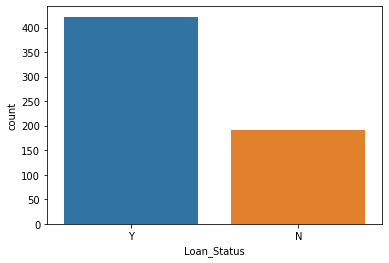

In [17]:
sns.countplot(data=train_df, x='Loan_Status', order=train_df.Loan_Status.value_counts().index)

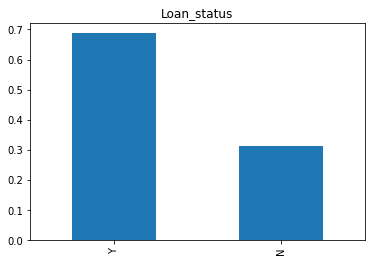

In [18]:
train_df["Loan_Status"].value_counts(normalize=True).plot.bar(title = "Loan_status")

# Analysis on Indpendent Variables(Categorical)

In [19]:
#Gender
train_df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
train_df["Gender"].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

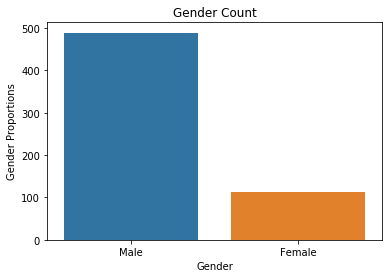

In [21]:
gender_count = train_df["Gender"].value_counts()
ax = sns.barplot(gender_count.index, gender_count.values)
plt.title("Gender Count")
plt.ylabel("Gender Proportions")
plt.xlabel("Gender")
plt.show()

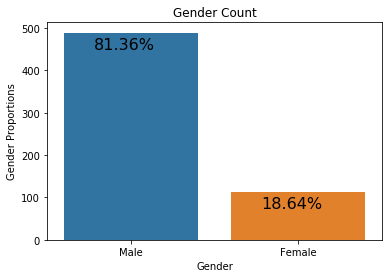

In [22]:
gender_count = train_df["Gender"].value_counts()
bx = sns.barplot(gender_count.index, gender_count.values)
bx.set_title("Gender Count")
bx.set_ylabel("Gender Proportions")
bx.set_xlabel("Gender")

totals = []
for i in bx.patches:
    totals.append(i.get_height())
    
total = sum(totals)    
for j in bx.patches:
    bx.text(j.get_x()+.18, j.get_height()-38,str(round((j.get_height()/total)*100,2))+'%',fontsize=16,color='black')    

In [23]:
#Credit History
train_df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
train_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

## Missing value treatment

In [25]:
#Filling the missing values
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

Credit_history,self_employed,Loan_amount,dependents,Loan_amount_term and Gender has missing values. \
    -For numerical varibles we can use Mean or Median \
    -For Categorical variables we use mode

In [26]:
#Credit_history has the most number of missing values so we fill it using mode
train_df["Credit_History"].fillna(train_df["Credit_History"].mode()[0],inplace=True)
train_df["Married"].fillna(train_df["Married"].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df["Dependents"].mode()[0],inplace=True)
train_df["Gender"].fillna(train_df["Gender"].mode()[0],inplace=True)
train_df["Self_Employed"].fillna(train_df["Self_Employed"].mode()[0],inplace=True)

In [27]:
#After fiiling the Categorical columns with mode lets check the whole dataset again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [28]:
#Even in the Loan_amount_term there are less number of missing values
train_df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
#As the value 360 is repeating the most so we will replace the missing values using mode of htis varibale
train_df["Loan_Amount_Term"].fillna(train_df["Loan_Amount_Term"].mode()[0],inplace=True)

In [30]:
train_df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
#As of LoanAmount it is a numerical variable so we use mean or median to impute the missing values
train_df["LoanAmount"].fillna(train_df["LoanAmount"].median(),inplace=True)

In [32]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
#All the missing values has been taken care of in the train dataset

In [34]:
#Now we impute issing values in the test dataset using the same method as above
test_df["Gender"].fillna(test_df["Gender"].mode()[0],inplace=True)
test_df['Dependents'].fillna(test_df["Dependents"].mode()[0],inplace=True)
test_df["Self_Employed"].fillna(test_df["Self_Employed"].mode()[0],inplace=True)
test_df["Loan_Amount_Term"].fillna(test_df["Loan_Amount_Term"].mode()[0],inplace=True)
test_df["Credit_History"].fillna(test_df["Credit_History"].mode()[0],inplace=True)
test_df["LoanAmount"].fillna(test_df["LoanAmount"].median(),inplace=True)

In [35]:
test_df.isnull().sum().sort_values(ascending=False)

Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

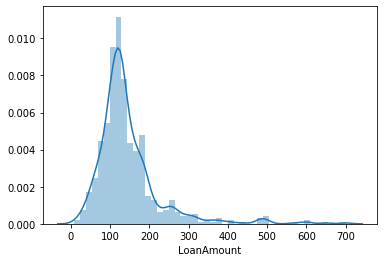

In [36]:
sns.distplot(train_df.LoanAmount)

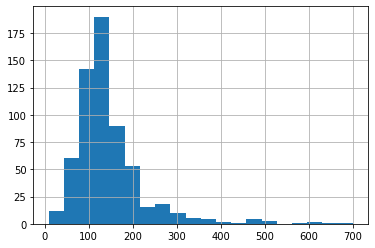

In [37]:
train_df['LoanAmount'].hist(bins=20)

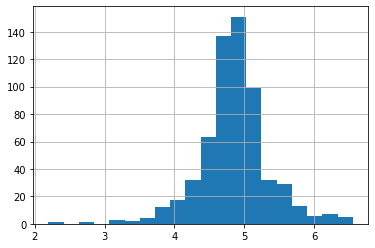

In [38]:
#The right skewness is due to the outlier present in the Loan Amount at the left and the right tail is longer
#To remove the skewness we can use log transformation as it doesn't affect the smaller values rather larger values are reduced
np.log(train_df.LoanAmount).hist(bins=20)

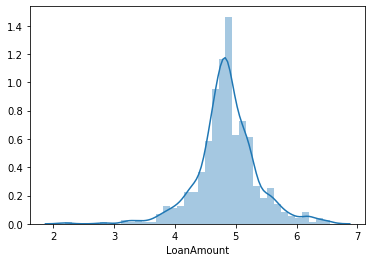

In [39]:
sns.distplot(np.log(train_df.LoanAmount))

In [40]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])

#### Loan amount has been normalised to and extent

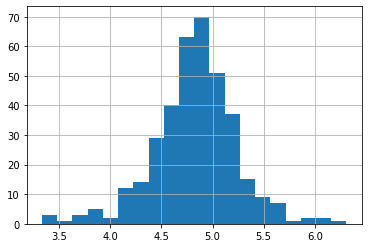

In [41]:
test_df["LoanAmount_log"]=np.log(test_df["LoanAmount"])
test_df["LoanAmount_log"].hist(bins=20)

## Encoding the Categorical variables

In [42]:
lb = LabelEncoder()
train_df.Loan_Status = lb.fit_transform(train_df.Loan_Status)

In [43]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


#### Replacing the variables to numerical form instead of using Encoder or get_dummies

In [44]:
df = train_df.copy()
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [45]:
df.drop("LoanAmount",axis=1,inplace=True)

In [46]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [47]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [48]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [49]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [50]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

# Correlation Matrix for Loan Status

Text(0.5, 1, 'Correlation Matrix (for Loan Status)')

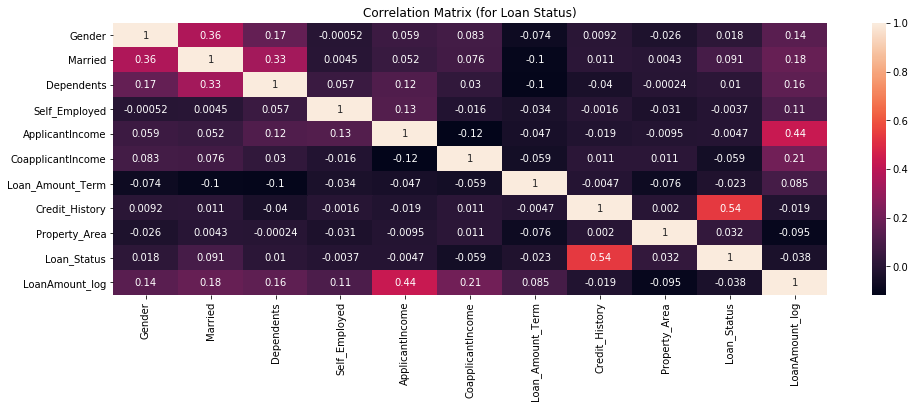

In [51]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

From the above matrix, we can see that <b>Credit History</b> (independant varibale) has the maximum correlation with <b>Loan Status</b>(dependant variable)

## Model Building

In [52]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [53]:
train_df.drop("LoanAmount",axis=1,inplace=True)

In [54]:
test_df.drop("LoanAmount",axis=1,inplace=True)

In [55]:
print(train_df.shape,test_df.shape)

(614, 12) (367, 11)


In [56]:
X = train_df.drop("Loan_Status",axis=1)
y = train_df[["Loan_Status"]]

In [57]:
print(X.shape,y.shape)

(614, 11) (614, 1)


In [58]:
X = pd.get_dummies(X)

In [59]:
X.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,360.0,1.0,4.852030,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,360.0,1.0,4.852030,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,360.0,1.0,4.787492,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,360.0,1.0,4.948760,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\manji\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = lr.predict(X_test)

In [63]:
#  prediction Summary by species
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



In [64]:
#Accuracy Score
lr_accuracy = accuracy_score(y_pred,y_test)
lr_accuracy*100

79.45945945945945

In [65]:
df_test = pd.get_dummies(test_df)
df_test.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,360.0,1.0,4.700480,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,360.0,1.0,4.836282,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,360.0,1.0,5.337538,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,360.0,1.0,4.605170,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,360.0,1.0,4.356709,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [66]:
#Logistic Regression goves 79% accuracy on the loan status so nwo we make prediction on the test dataset
test_y_pred = lr.predict(df_test)

## Decison Tree|

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
dt_pred = dt.predict(X_test)

In [69]:
#  prediction Summary by species
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        61
           1       0.79      0.81      0.80       124

    accuracy                           0.73       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.73      0.73      0.73       185



In [70]:
dt_accuracy = accuracy_score(dt_pred,y_test)
dt_accuracy*100

72.97297297297297

In [71]:
#Making prediction on the test dataset
dt_y_pred = dt.predict(df_test)

## Random Forest

i)RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

ii)For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

iii)Final prediction can be a function of all the predictions made by the individual learners

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train,y_train)

C:\Users\manji\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rf_pred = rf.predict(X_test)

In [75]:
#  prediction Summary by species
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        61
           1       0.77      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185



In [76]:
rf_accuracy = accuracy_score(rf_pred,y_test)
rf_accuracy*100

77.83783783783784

In [77]:
#Making prediction on the test dataset
rf_y_pred = rf.predict(df_test)

## XGBoost

In [78]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

C:\Users\manji\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manji\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xgb_pred = xgb.predict(X_test)

In [80]:
#  prediction Summary by species
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57        61
           1       0.78      0.90      0.84       124

    accuracy                           0.76       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.76      0.75       185



In [81]:
xgb_accuracy = accuracy_score(xgb_pred,y_test)
xgb_accuracy*100

76.21621621621621

In [82]:
#makig prediciton on  the test dataset
xgb_y_pred = xgb.predict(df_test)

In [83]:
score = [lr_accuracy,dt_accuracy,rf_accuracy,xgb_accuracy]
Models = pd.DataFrame({'Models':["Logistic Regression","Decison Tree","Random Forest","XGBoost"],'Score':score})

In [84]:
Models.sort_values(by="Score",ascending=False)

,Models,Score
0,Logistic Regression,0.794595
2,Random Forest,0.778378
3,XGBoost,0.762162
1,Decison Tree,0.729730


## Feature Importance

As 'LogisticRegression' object has no attribute 'featureimportances' so we choose next high accuracy predictive model. Random Forest model is 2nd highest model.

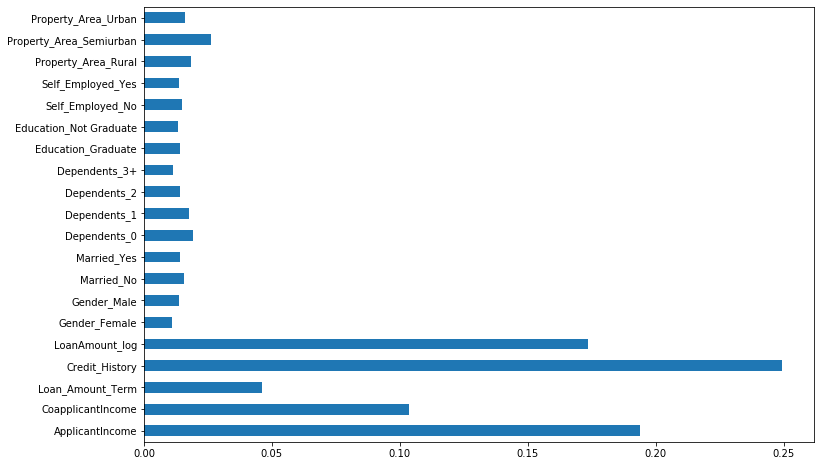

In [85]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

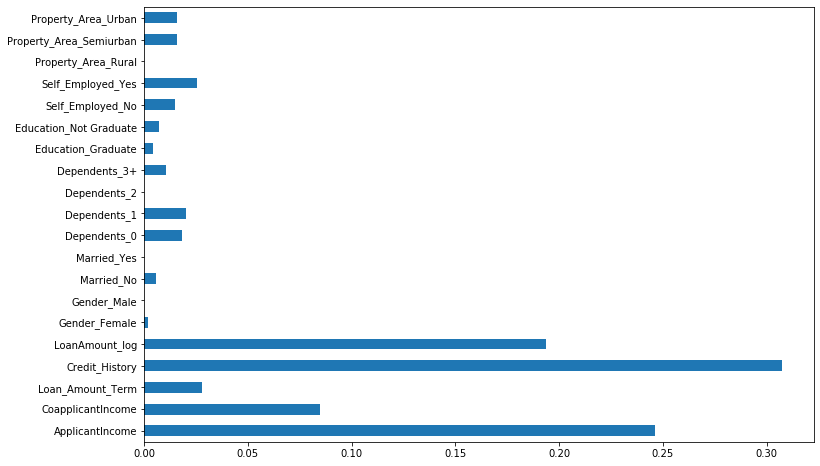

In [86]:
importances1 = pd.Series(dt.feature_importances_,index=X.columns)
importances1.plot(kind='barh', figsize=(12,8))

We can find out that 'Credit_History','Balance Income' feature are most important. So, feature engineering helped us in predicting our target variable.